In [1]:
import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [44]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

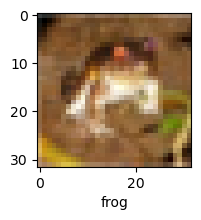

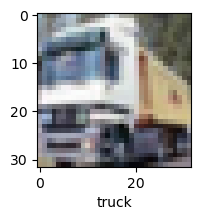

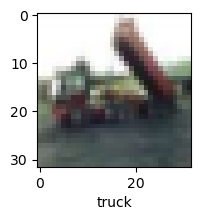

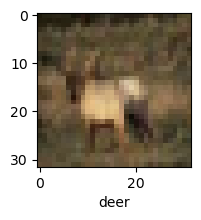

In [16]:
def pltshow(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
for i in range(4):
    pltshow(X_train,y_train,i)

In [17]:
X_train = X_train/255
X_test = X_test/255

<b>Build simple artificial neural network for image classification</b>

In [18]:
ann = models.Sequential([
                    layers.Flatten(input_shape=(32,32,3)),
                    layers.Dense(3000,activation="relu"),
                    layers.Dense(1000,activation="relu"),
                    layers.Dense(10,activation="sigmoid")
                        ])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 309s 197ms/step - loss: 1.8154 - accuracy: 0.3507
Epoch 2/5
1563/1563 [==============================] - 411s 263ms/step - loss: 1.6234 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 401s 256ms/step - loss: 1.5412 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 333s 213ms/step - loss: 1.4859 - accuracy: 0.4733
Epoch 5/5
1563/1563 [==============================] - 269s 172ms/step - loss: 1.4351 - accuracy: 0.4947


In [19]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 21s 65ms/step - loss: 1.4769 - accuracy: 0.4783


[1.4768567085266113, 0.478300005197525]

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:\n ", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 21s 66ms/step
Classification Report:
                precision    recall  f1-score   support

           0       0.59      0.48      0.53      1000
           1       0.68      0.51      0.58      1000
           2       0.35      0.38      0.36      1000
           3       0.35      0.42      0.38      1000
           4       0.53      0.30      0.38      1000
           5       0.44      0.28      0.34      1000
           6       0.42      0.73      0.53      1000
           7       0.65      0.46      0.54      1000
           8       0.44      0.78      0.56      1000
           9       0.62      0.46      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



<b>build a convolutional neural network to train our images</b>

In [24]:
cnn = models.Sequential([
                    #cnn
                    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
                    layers.MaxPooling2D((2,2)),
                    
                    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
                    layers.MaxPooling2D((2,2)),
    
                    #dense
                    layers.Flatten(),
                    layers.Dense(64,activation="relu"),
                    layers.Dense(10,activation="softmax")
])

In [27]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [28]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 105s 66ms/step - loss: 1.5035 - accuracy: 0.4577
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.1719 - accuracy: 0.5862
Epoch 3/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.0508 - accuracy: 0.6339
Epoch 4/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9819 - accuracy: 0.6580
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.9275 - accuracy: 0.6756
Epoch 6/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.8823 - accuracy: 0.6933
Epoch 7/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.8428 - accuracy: 0.7066
Epoch 8/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8064 - accuracy: 0.7181
Epoch 9/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.7795 - accuracy: 0.7275
Epoch 10/10
1563/1563 [==============================] 

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.9240 - accuracy: 0.6884


[0.923987627029419, 0.6883999705314636]

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 7s 22ms/step


array([[7.81799387e-03, 3.79665464e-04, 1.77731607e-02, 9.12868023e-01,
        5.39016793e-04, 4.13855053e-02, 1.23259574e-02, 7.47462735e-04,
        5.42368740e-03, 7.39512965e-04],
       [3.53347743e-03, 8.68086040e-01, 2.67761734e-05, 7.73841202e-06,
        3.04951664e-06, 3.62891015e-08, 1.55694309e-07, 4.21310579e-05,
        1.17375664e-01, 1.09249130e-02],
       [2.61825901e-02, 2.23003522e-01, 1.03981397e-03, 1.35266117e-03,
        3.91003850e-04, 5.69556760e-05, 3.06118600e-04, 1.64702930e-03,
        7.36115754e-01, 9.90453269e-03],
       [8.75856340e-01, 2.76297145e-03, 5.53357340e-02, 3.15869402e-04,
        5.69986589e-02, 3.59388978e-05, 1.04171617e-04, 1.13365473e-03,
        7.27467472e-03, 1.81920899e-04],
       [1.89723742e-05, 1.11904355e-05, 1.40937697e-02, 3.36825736e-02,
        3.42430294e-01, 3.06783360e-03, 6.06637418e-01, 5.07333098e-05,
        7.20179514e-06, 9.18408283e-09]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

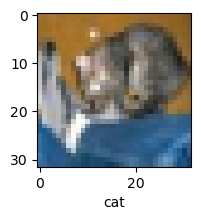

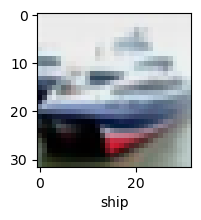

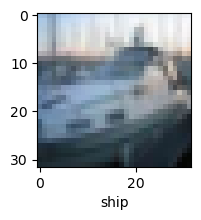

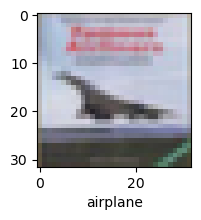

In [52]:
for i in range(4):
    pltshow(X_test,y_test,i)

In [50]:
classes[y_classes[3]]

'airplane'